Working on the pre-line calculation grid de-refine. What I've got seems to be mostly there but it keeps trowing up errors saying it's trying to remove children that arent there.

`In shrinkChildArray, attempting to delete a 
 child that doesn't exist.
          -2 F F F F F F F T
 nchildren            8
 haschild  T T T T T T T T
 mask  F F F F F F F T
  and  F F F F F F F T
 xor  F F F F F F F T
           1           7 F`
           
Looking into the code that throws this error (shrinkchildarray in amr_mod) shows that it throws an error when the requested cell to delete doesnt have a child.

Looking into it further it also seems to throw an error when a child from a cell isnt requested to be deleted (cellsToDelete XOR cellExists)

Turns out this was a weird gfortran bug and the code compiled fine with ifort (strange, though zen does have an old version of gfortran 4.9 to current 5(stable) and 6 (development)) and tim said there was a bug in gfortran that they spotted and submitted a bug report for before.  

Other than that the implementation was fairly easy, though I had to move the routine to gridio in order to do the derefinement before the modelwashydro flag interpolates the densities and velocities to the cell corners. This information is not preserved during grid unrefining so that needs to happen first, and the corners are done at grid read in time.  

Quick bit of testing shows with a threshold density (ie all leaves need to be below this density) of 1e-19 g/cm<sup>3</sup> and two passes at 10% then 1% tolerance reduces the grid size by 1/3 from 6.65 to 4.51Gb.  This still seems a lot to me might be worth investigating doing a third pass at low tolerance (maybe 0.1%) but no density threshold.

For implementing CAK line driving, there is a function in math_mod which calculate velocity derivatives along a los (directionalDeriv, which despite taking the "opacity grid" as an input parameter is taking the derivative of the velocity along the direction not the opacity.

Idea for the doing disc winds in torus. As it can use an arbitrary number of sources (check with tim whether large n is bad computationaly) and models them as spheres, allowing photons to be emitted from the surface, have disc luminosity split into discrete parts as with the mg models, but have them with finite size ~h ~h/2 that way there is less of a point source effect and less radation pressure in the middle where it should be symmetric about the plane anyway, e.g.

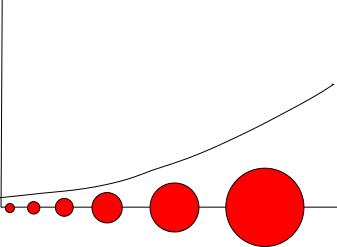

In [1]:
from IPython.display import Image
Image(filename='sources.png')

on second thoughts, the radius of the sources will have to be determined so that the temperature matches up with the disc temperature at that point. T ~ R<sup>-1/2</sup> h ~ <sup>5/4</sup> L ~ R<sup>2</sup> /R (assuming spacing between sources goes as R) L ~ r<sup>2</sup>T<sup>4</sup> => r~R<sup>9/16</sup> cf h~R<sup>20/16</sup>

in order to get radii ~R<sup>5/4</sup> the spacing between sources would have to go as R<sup>27/8</sup> = R<sup>3.375</sup>